In [1]:
import os
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from itertools import cycle
import pickle
import matplotlib as mpl
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Arial"]

In [2]:
# Define color palette
color_palette = plt.get_cmap('tab10')

# Create a cycle of colors
color_cycle = cycle(range(10))
for nr, c in enumerate(color_cycle):
    print(color_palette(c))
    if nr == 10:
        break

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
(0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
(0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)
(0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0)
(0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0)
(0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0)
(0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0)
(0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0)
(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)
(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)


In [3]:
# def scatterplotRegressionMultiInputs(df, file_name='asd', multidataset_col=False):
#     """Plots a Regressionplot with a text annotation containing additional information
#     Args:
#         df (pd.DataFrame): DataFrame consisting of the Actual and the Predicted Volatility Values
#         model_type (str): Name of the model
#         EPOCHS (int): the amount of epochs, the model was trained on
#         BATCH_SIZE (int): number of training examples
#         It does not return anything, but plots a regression plot and saves it
#     """
#     beta, alpha = np.polyfit(df.iloc[:,0], df.iloc[:,1], 1)
#     corr_value = df.corr(method="pearson")
#     pearson_corr = corr_value.iloc[1,0]
#     rmse = ((df.iloc[:, 0] - df.iloc[:, 1]) ** 2).mean() ** .5
#     parameter_text = "\n".join(
#         (
#             r"$pearson\ corr=%.2f$" % (pearson_corr,),
#             r"$slope: \beta=%.2f$" % (beta,),
#             r"$intercept: \alpha=%.2f$" % (alpha,),
#             r"$rmse: \alpha=%.2f$" % (rmse,),
#         )
#     )
#     print(file_name)
#     print(parameter_text)
#     plt.figure()
#     sns.set(rc={"figure.figsize": (15, 10)})
#     sns.regplot(
#         data=df,
#         x=df.columns[0],
#         y=df.columns[1],
#         x_ci="sd",
#         scatter=True,
#         # line_kws={"color": "red"},
#         style=multidataset_col,
#     )
#     # add text annotation
#     # set the textbox color to purple
#     purple_rgb = (255.0 / 255.0, 2.0 / 255.0, 255.0 / 255.0)
#
#     plt.annotate(
#         parameter_text,
#         xy=(0.03, 0.8),
#         xycoords="axes fraction",
#         ha="left",
#         fontsize=14,
#         # color=purple_rgb,
#         backgroundcolor="w",
#     )
#     plt.grid(True)
#     plt.title('Scatterplot', fontsize=14)
#     plt.xlabel('Actual', fontsize=14)
#     plt.ylabel('Prediction', fontsize=14)
#     # finally save the chart to disk
#     # plt.savefig(run_path + 'Scatterplot_' + file_name + ".png", dpi=300, bbox_inches="tight")
#     plt.show()
#     plt.close()
#     return beta, alpha, pearson_corr, rmse

In [4]:
# def format_parameters(pearson_corrs, betas, alphas, rmses, colors):
#     pearson_str = " ".join([f"<span style='color:{colors[i]}'>%.2f</span>" % p for i, p in enumerate(pearson_corrs)])
#     rmses_str = " ".join([f"<span style='color:{colors[i]}'>%.2f</span>" % rms for i, rms in enumerate(rmses)])
#     betas_str = " ".join([f"<span style='color:{colors[i]}'>%.2f</span>" % beta for i, beta in enumerate(betas)])
#     alphas_str = " ".join([f"<span style='color:{colors[i]}'>%.2f</span>" % alpha for i, alpha in enumerate(alphas)])
#     parameter_text = f"$pearson\ corr={pearson_str}$\nslope: \beta={betas_str}$\n$intercept: \alpha={alphas_str}$\n$rmse: {rmses_str}$"
#     return parameter_text

In [5]:
import pandas as pd
import numpy as np

# Haversine distance function
def haversine(lat1, lon1, lat2, lon2):
    R = 6371 # Radius of earth in kilometers
    dlat = np.radians(lat2-lat1)
    dlon = np.radians(lon2-lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Create a synthetic dataframe
data = {'clustered': [1,1,2,2,2,1,1,2,2,2],
        'DHSYEAR': [2001,2002,2001,2002,2003,2003,2004,2003,2004,2005],
        'LATNUM': [10,12,14,16,18,12,14,16,18,20],
        'LONGNUM': [10,12,14,16,18,12,14,16,18,20]}
clustered_df = pd.DataFrame(data)

cluster_cols = ['clustered']

# Corrected processing logic
new_l = []
for group_name, group in clustered_df.groupby(cluster_cols):
    print(group_name, group)
    years = list(sorted(group['DHSYEAR'].unique()))
    if len(years) >= 2:
        for y1, y2 in zip(years[:-1], years[1:]):
            sub1 = group[group['DHSYEAR'] == y1]
            sub2 = group[group['DHSYEAR'] == y2]
            print('s', sub1, sub2)
            for index1, row1 in sub1.iterrows():
                sub_d = []
                for index2, row2 in sub2.iterrows():
                    print('r', row1, row2)
                    sub_d.append((row1, row2, haversine(row1['LATNUM'], row1['LONGNUM'], row2['LATNUM'], row2['LONGNUM'])))
                sub_d = sorted(sub_d, key=lambda x: x[2])
                new_row = pd.merge(sub_d[0][0].to_frame().T, sub_d[0][1].to_frame().T, on=['clustered'])
                new_row['distance'] = sub_d[0][2]
                new_l.append(new_row)
print('l', new_l)
print('r', new_row)
scatter_between_years_df = pd.concat(new_l)

print(scatter_between_years_df)

1    clustered  DHSYEAR  LATNUM  LONGNUM
0          1     2001      10       10
1          1     2002      12       12
5          1     2003      12       12
6          1     2004      14       14
s    clustered  DHSYEAR  LATNUM  LONGNUM
0          1     2001      10       10    clustered  DHSYEAR  LATNUM  LONGNUM
1          1     2002      12       12
r clustered       1
DHSYEAR      2001
LATNUM         10
LONGNUM        10
Name: 0, dtype: int64 clustered       1
DHSYEAR      2002
LATNUM         12
LONGNUM        12
Name: 1, dtype: int64
s    clustered  DHSYEAR  LATNUM  LONGNUM
1          1     2002      12       12    clustered  DHSYEAR  LATNUM  LONGNUM
5          1     2003      12       12
r clustered       1
DHSYEAR      2002
LATNUM         12
LONGNUM        12
Name: 1, dtype: int64 clustered       1
DHSYEAR      2003
LATNUM         12
LONGNUM        12
Name: 5, dtype: int64
s    clustered  DHSYEAR  LATNUM  LONGNUM
5          1     2003      12       12    clustered  DHSYEAR  LATN

In [6]:
def format_parameters(pearson_corrs, betas, alphas, rmses, colors):
    pearson_str = " ".join([str(p) for p in pearson_corrs])
    rmses_str = " ".join([str(rms) for rms in rmses])
    betas_str = " ".join([str(beta) for beta in betas])
    alphas_str = " ".join([str(alpha) for alpha in alphas])
    parameter_text = f"$pearson\ corr={pearson_str}$\nslope: \beta={betas_str}$\n$intercept: \alpha={alphas_str}$\n$rmse: {rmses_str}$"
    return parameter_text

In [7]:
def scatterplotRegressionMultiInputs(df_l, file_name='scatterplot'):
    """Plots a regression plot with a text annotation containing additional information

    Args:
        df_l (list): List of DataFrames consisting of the actual and predicted columns
        file_name (str): Name of the output file (default: 'scatterplot')

    Returns:
        tuple: Tuple containing the beta, alpha, Pearson correlation coefficient, and RMSE of the regression
    """
    betas, alphas, pearson_corrs, rmses = [], [], [], []
    plt.figure()

    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    # colors = ["red", "green", "blue"]

    for i, df in enumerate(df_l):
        [actual_col, predicted_col] = df.columns
        # fit a linear regression model to the data
        X = df[[actual_col]]
        y = df[predicted_col]
        model = LinearRegression()
        model.fit(X, y)

        # calculate regression statistics
        beta = model.coef_[0]
        alpha = model.intercept_
        corr_value = df.corr(method="pearson")
        pearson_corr = corr_value.loc[predicted_col, actual_col]
        rmse = np.sqrt(((df[actual_col] - df[predicted_col]) ** 2).mean())

        betas.append(round(beta, 2))
        alphas.append(round(alpha, 2))
        pearson_corrs.append(round(pearson_corr, 2))
        rmses.append(round(rmse, 2))

        # create the scatter plot
        sns.set(rc={"figure.figsize": (5, 4)})
        sns.regplot(
            data=df,
            x=actual_col,
            y=predicted_col,
            x_ci="sd",
            scatter=True,
            color=colors[i],
            label=predicted_col
        )

    # create the parameter text for the annotation
    parameter_text = format_parameters(pearson_corrs, betas, alphas, rmses, colors)

    # # add the parameter text as an annotation
    # plt.annotate(
    #     parameter_text,
    #     xy=(0.03, 0.8),
    #     xycoords="axes fraction",
    #     ha="left",
    #     fontsize=14,
    #     backgroundcolor="w",
    # )
    plt.annotate(parameter_text,
                 xy=(0.03, 0.97),
                 xycoords="axes fraction", fontsize=10, ha="left", va="top",
                 # usetex=True,
                 )


    plt.grid(True)
    plt.title('Scatterplot', fontsize=14)
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.legend(loc='lower right')
    plt.show()
    plt.close()

    return betas, alphas, pearson_corrs, rmses

/mnt/datadisk/sharedPrograms/venv/water_2202_tf82/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8 ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


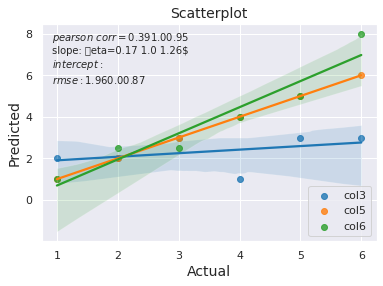

[0.17, 1.0, 1.26] [1.73, 0.0, -0.57] [0.39, 1.0, 0.95] [1.96, 0.0, 0.87]


In [8]:
df_in = pd.DataFrame({
    'col1': ['hello', 'hello', 'how', 'are', 'how', 'how'],
    'col2': [1, 2, 3, 4, 5, 6],
    'col3': [2, 2, 3, 1, 3, 3],
    'col5': [1, 2, 3, 4, 5, 6],
    'col6': [1, 2.5, 2.5, 4, 5, 8],
    'col4': ['a', 'a', 'a', 'b', 'a', 'a']
})
df = df_in[['col2', 'col3', 'col5', 'col6']]
df_l = [df[['col2', 'col3']], df[['col2', 'col5']], df[['col2', 'col6']]]
beta, alpha, pearson_corr, rmse = scatterplotRegressionMultiInputs(df_l)
print(beta, alpha, pearson_corr, rmse)
